# Linear Regression  
### Hàm mất mát  
Hàm mất mát (loss function) là hàm mà khi nó đạt giá trị càng nhỏ thì nghiệm của bài toán càng chính xác. Điều ta cần làm là tối ưu hàm này.  
Hàm mất mát trong Hồi quy tuyến tính, khi xây dựng mô hình, ta mong muốn giá trị dự đoán sẽ không khác quá nhiều so với giá trị thực tế.  
$$ \frac{1}{2} (y - y_{dd})^{2} = 0$$ 
$$ y_{dd} = w_1x_1 + w_2x_2 +...+ w_dx_d + w_0 $$  
Trong đó :  
- $ y $ là giá trị thực tế.
- $ y_{dd} $ là giá trị dự đoán.  
- $w$ là trọng số.
- $x$ là thuộc tính.
- $d$ là số chiều.

Tiếp theo, ta sẽ dùng gradient descent để tìm nghiệm cho 1 ví dụ hồi quy tuyến tính.  
Vẽ các điểm dữ liệu xung quanh đường thẳng y = -3x + 2  
Xem thuật toán có tìm ra nghiệm hay không, tức là tìm ra [2, -3] 

yes
[[ 2.46092887]
 [-3.02227028]]


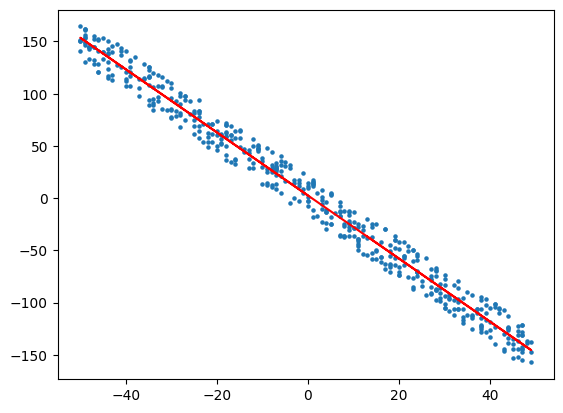

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

X = np.random.randint(-50, 50, 500)
Xbar = np.array([[1, x]for x in X])
y = np.array([[-3*i + 2 + random.uniform(-20, 20)] for i in X])

def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def GD(w_init, eta):
    w = [w_init]
    for i in range(10000):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new)) < 1.e-1:
            print("yes")
            break
        w.append(w_new)
    return (w[-1], i)   

w_init = np.array([[5, -7]]).T
(w, iter) = GD(w_init, 0.001)
print(w)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X, y, s=5)

yResult = [w[1]*x + w[0] for x in X]
ax.plot(X, yResult, "red")

### Đạo hàm của hàm nhiều biến phổ biến  
Đạo hàm vector : x a b là vector; A là ma trận
| $f(x)$ | $f^{'}(x)$ |
|:-----|:-----|
|$a^T x$ | $a$ |
| $x^TAx$| $(A + A^T)x$|
| $x^Tx = \|\|x\|\|^2_2 $ | $2x$ |
| $ \|\| Ax - b \|\|^2_2 $ | $2A^T (Ax - b)$ |
| $a^Tx^Txb$ | $2a^Tbx$ |
| $a^Txx^Tb$ | $(ab^T + ba^T)x$ |  

Đạo hàm ma trận : X Y là ma trận; a b là vector

|$f(X)$|$∇f(X)$|
|:-----|:------|
|$a^TX^TXb$| $X(ab^T + ba^T)$ |
|$a^TXX^Tb$|$(ab^T + ba^T)X$|
|$a^TYX^Tb$|$ba^TY$|
|$a^TY^TXb$|$Yab^T$|
|$a^TXY^Tb$|$ab^TY$|
|$a^TX^TYb$|$Yab^T$|